In [1]:
import json

# Load the annotation file
with open("/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/annotations/instances_train2017.json", "r") as f:
    data = json.load(f)

# Example: get the first image and its filename
first_image = data["images"][0]
print("Image filename:", first_image["file_name"])

# Example: get the first bounding box
first_annotation = data["annotations"][0]
print("Bounding box (x, y, width, height):", first_annotation["bbox"])


Image filename: 000001.jpg
Bounding box (x, y, width, height): [167.04, 40.21, 202.79, 131.34]


## Data Exploration/Loading the data

In [4]:
import json
import numpy as np
from collections import defaultdict

def load_annotations(annotation_path, num_categories=6):
    """
    Loads image filenames and multi-label binary vectors from a COCO-style annotation file.

    Returns:
        image_label_list: list of tuples (filename, binary label vector)
    """
    with open(annotation_path, "r") as f:
        data = json.load(f)

    image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}
    image_to_categories = defaultdict(set)
    
    for ann in data['annotations']:
        image_to_categories[ann['image_id']].add(ann['category_id'])

    image_label_list = []
    for image_id, filename in image_id_to_filename.items():
        label_vector = np.zeros(num_categories)
        for cat_id in image_to_categories[image_id]:
            if cat_id < num_categories:
                label_vector[cat_id] = 1
        image_label_list.append((filename, label_vector))

    return image_label_list


In [6]:
train_data = load_annotations("/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/annotations/instances_train2017.json")
test_data = load_annotations("/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/annotations/instances_test2017.json")

In [8]:
print(data.keys())

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])


In [10]:
print("LICENSES:", data["licenses"][0])
print("INFO:", data["info"])
print("CATEGORIES:", data["categories"][0])
print("IMAGES:", data["images"][0])
print("ANNOTATIONS:", data["annotations"][0])

LICENSES: {'name': 'CarDD', 'id': 0, 'url': 'https://cardd-ustc.github.io/'}
INFO: {'contributor': 'Xinkuang Wang, Wenjing Li, Zhongcheng Wu', 'date_created': '2022.05.01', 'description': 'CarDD for car damage detection in COCO Format.', 'url': 'https://cardd-ustc.github.io/', 'version': 'v1.0'}
CATEGORIES: {'id': 1, 'name': 'dent'}
IMAGES: {'id': 1, 'width': 1000, 'height': 750, 'file_name': '000001.jpg', 'license': 0}
ANNOTATIONS: {'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [[233.35, 46.65, 217.25, 58.24, 210.82, 65.97, 204.38, 78.2, 197.3, 93.0, 192.15, 104.59, 187.0, 112.96, 180.56, 123.91, 174.12, 135.49, 169.61, 144.51, 167.04, 154.16, 167.04, 165.11, 175.41, 170.9, 185.71, 171.55, 196.01, 167.68, 205.02, 161.24, 214.03, 154.81, 224.33, 148.37, 233.99, 141.93, 244.29, 134.21, 256.52, 128.41, 267.47, 125.19, 277.77, 122.62, 288.71, 119.4, 298.37, 116.82, 310.6, 113.61, 322.83, 109.1, 333.13, 105.88, 344.08, 103.95, 355.02, 101.37, 366.61, 97.51, 369.83, 87.21, 364.6

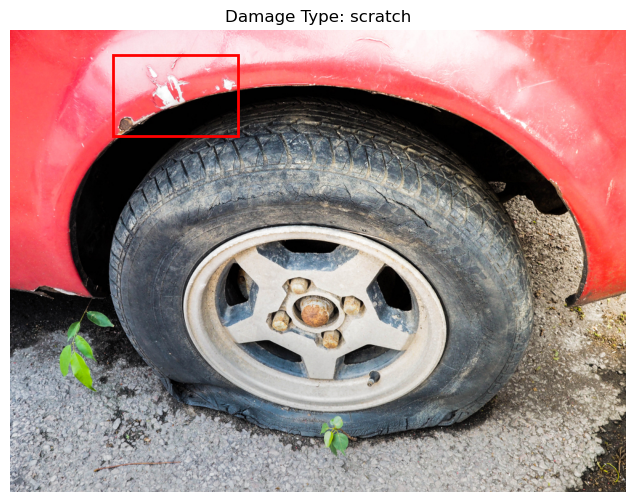

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# === Create a mapping from image ID to file name ===
image_id_to_filename = {img["id"]: img["file_name"] for img in data["images"]}

# === Pick the first annotation ===
annotation = data["annotations"][0]
image_id = annotation["image_id"]
bbox = annotation["bbox"]  # [x, y, width, height]
category_id = annotation["category_id"]

# === Get image filename ===
image_filename = image_id_to_filename[image_id]
image_path = f"/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/train2017/{image_filename}"

# === Load and plot image ===
img = Image.open(image_path)

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(img)
ax = plt.gca()

# Draw bounding box
x, y, w, h = bbox
rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Optional: Show category name
categories = {cat["id"]: cat["name"] for cat in data["categories"]}
plt.title(f"Damage Type: {categories[category_id]}")
plt.axis('off')
plt.show()


In [14]:

# Print all category names and IDs
for cat in data['categories']:
    print(f"ID: {cat['id']}, Name: {cat['name']}")


ID: 1, Name: dent
ID: 2, Name: scratch
ID: 3, Name: crack
ID: 4, Name: glass shatter
ID: 5, Name: lamp broken
ID: 6, Name: tire flat


In [16]:
from collections import defaultdict

# Build a mapping from image_id to list of category_ids
image_to_labels = defaultdict(list)

for ann in data['annotations']:
    image_to_labels[ann['image_id']].append(ann['category_id'])

# Print how many labels each image has
multi_label_images = {k: v for k, v in image_to_labels.items() if len(v) > 1}
print(f"Number of images with multiple labels: {len(multi_label_images)}")


Number of images with multiple labels: 1545


In [18]:
#building a dict that maps image_id to set of category_ids
#converts each set of categories to a binary vector of length 6 (one for each damage type)

import json
from collections import defaultdict
import numpy as np

#mapping from image_id -> filename
image_id_to_filename = {img['id']: img['file_name'] for img in data['images']}

#Map image_id -> list of category_ids (can be multiple)
image_to_categories = defaultdict(set)
for ann in data['annotations']:
    image_id = ann['image_id']
    cat_id = ann['category_id'] - 1  # shift from 1-based to 0-based indexing
    image_to_categories[image_id].add(cat_id)

#creating binary label vectors for each image
all_image_data = []

for image_id, filename in image_id_to_filename.items():
    label_vector = np.zeros(6, dtype=int)  # 6 categories
    for cat_id in image_to_categories[image_id]:
        label_vector[cat_id] = 1
    all_image_data.append((filename, label_vector))

# Preview:
for i in range(3):
    print(all_image_data[i])

('000001.jpg', array([0, 1, 0, 0, 0, 1]))
('000002.jpg', array([0, 0, 0, 0, 0, 1]))
('000003.jpg', array([0, 0, 0, 0, 0, 1]))


In [11]:
conda install torchvision

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 200 None
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 200 None
done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-arm64::scikit-image

DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/ca-certificates-2025.2.25-hca03da5_0.conda HTTP/1.1" 200 133749



ca-certificates-2025 | 131 KB    | ####5                                 |  12% DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/gensim-4.3.3-py311h7aedaa7_0.conda HTTP/1.1" 200 44444042
gensim-4.3.3         | 42.4 MB   |                                       |   0% DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/certifi-2025.1.31-py311hca03da5_0.conda HTTP/1.1" 200 168434




certifi-2025.1.31    | 164 KB    | ###5                                  |  10% 


ca-certificates-2025 | 131 KB    | ##################################### | 100% DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/conda-23.7.4-py311hca03da5_0.conda HTTP/1.1" 200 1408898


conda-23.7.4         | 1.3 MB    | 4                                     |   1% DEBUG:ur

In [20]:
#The code loads an image from the specified directory, applies transformations (like resizing and normalization), and converts the image into a tensor. 
#It also converts the corresponding multi-label classification into a tensor, representing the damage categories for that image.

from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import os
import json

# Loading the image label list (you've already done this)
# Assuming you have the `all_image_data` ready to go

class CarDamageDataset(Dataset):
    def __init__(self, image_label_list, root_dir, transform=None):
        self.image_label_list = image_label_list
        self.root_dir = root_dir  # Corrected root_dir here
        self.transform = transform

    def __len__(self):
        return len(self.image_label_list)

    def __getitem__(self, idx):
        img_name, label = self.image_label_list[idx]
        img_path = os.path.join(self.root_dir, img_name)  # Correct path to image
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(label, dtype=torch.float32)
        return image, label

# Define preprocessing transforms (VGG16-style)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # VGG16/ResNet mean/std
                         std=[0.229, 0.224, 0.225])
])

# Load dataset with corrected root_dir
dataset = CarDamageDataset(image_label_list=all_image_data, 
                            root_dir='/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/train2017', 
                            transform=transform)

# Example: view shape of one sample
img_tensor, label_tensor = dataset[0]
print(img_tensor.shape)  # Should be torch.Size([3, 224, 224])
print(label_tensor)      # e.g. tensor([0., 1., 0., 0., 0., 1.])

torch.Size([3, 224, 224])
tensor([0., 1., 0., 0., 0., 1.])


In [22]:
import torch.nn as nn
import torchvision.models as models

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to output 6 values (for 6 labels)
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 6),
    nn.Sigmoid()  # Sigmoid for multi-label classification
)

/Users/keenanwillison/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/keenanwillison/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
import torch.optim as optim

# Loss function
criterion = nn.BCELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
#loading validation dataset

with open("/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/annotations/instances_val2017.json", "r") as f:
    validation_data = json.load(f)

In [34]:
from torch.utils.data import DataLoader

# Define the dataloader for training (if not already defined)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

#Build mapping from image_id -> filename for validation set
image_id_to_filename_val = {img['id']: img['file_name'] for img in validation_data['images']}

#Map image_id -> list of category_ids for validation set (can be multiple)
image_to_categories_val = defaultdict(set)
for ann in validation_data['annotations']:
    image_id = ann['image_id']
    cat_id = ann['category_id'] - 1  # shift from 1-based to 0-based indexing
    image_to_categories_val[image_id].add(cat_id)

# Create binary label vectors for each image in the validation set
all_image_data_val = []

for image_id, filename in image_id_to_filename_val.items():
    label_vector = np.zeros(6, dtype=int)  # 6 categories
    for cat_id in image_to_categories_val[image_id]:
        label_vector[cat_id] = 1
    all_image_data_val.append((filename, label_vector))

# Create the validation dataset and loader
validation_dataset = CarDamageDataset(
    image_label_list=all_image_data_val,
    root_dir='/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/val2017',  # Adjust path accordingly
    transform=transform
)

# Create a DataLoader for the validation dataset
validation_loader = DataLoader(validation_dataset, batch_size=16, shuffle=False)



# Training loop with validation evaluation after each epoch
num_epochs = 5
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Ensure the model is in training mode
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()        # Reset gradients
        outputs = model(images)      # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()              # Backward pass
        optimizer.step()             # Update weights

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")

    # Validation after each epoch
    model.eval()  # Set model to evaluation mode (turn off dropout, batch norm updates, etc.)
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients for validation
        for images, labels in validation_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate accuracy (thresholding for multi-label classification)
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.numel()  # Total number of labels

    val_loss = val_loss / len(validation_loader)
    accuracy = correct / total * 100  # Percentage of correct predictions

    print(f"Validation Loss after Epoch {epoch+1}: {val_loss:.4f}")
    print(f"Validation Accuracy after Epoch {epoch+1}: {accuracy:.2f}%")

# Save the trained model
torch.save(model.state_dict(), "car_damage_model.pth")

Epoch [1/5], Loss: 71.4544
Validation Loss after Epoch 1: 0.3888
Validation Accuracy after Epoch 1: 81.77%
Epoch [2/5], Loss: 63.5084
Validation Loss after Epoch 2: 0.3537
Validation Accuracy after Epoch 2: 83.64%
Epoch [3/5], Loss: 57.6515
Validation Loss after Epoch 3: 0.3494
Validation Accuracy after Epoch 3: 83.60%
Epoch [4/5], Loss: 55.2763
Validation Loss after Epoch 4: 0.3225
Validation Accuracy after Epoch 4: 84.71%
Epoch [5/5], Loss: 51.2658
Validation Loss after Epoch 5: 0.3448
Validation Accuracy after Epoch 5: 83.25%


In [36]:
#from torch.utils.data import DataLoader

# Prepare dataloader
#dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Move model to GPU if available
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = model.to(device)

# Training loop
#num_epochs = 5
#model.train()  # Set model to training mode

#for epoch in range(num_epochs):
    #running_loss = 0.0
    #for images, labels in dataloader:
        #images = images.to(device)
        #labels = labels.to(device)

        #optimizer.zero_grad()        # Reset gradients
        #outputs = model(images)      # Forward pass
        #loss = criterion(outputs, labels)  # Compute loss
        #loss.backward()              # Backward pass
        #optimizer.step()             # Update weights

        #running_loss += loss.item()

    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}")


# Save the trained model
#torch.save(model.state_dict(), "car_damage_model.pth")

In [38]:
import json
from collections import defaultdict
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

# Define transformation (must match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load test dataset annotation file
with open("/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/annotations/instances_test2017.json", "r") as f:
    data_test = json.load(f)

# Step 1: Build mapping from image_id -> filename
image_id_to_filename_test = {img['id']: img['file_name'] for img in data_test['images']}

# Step 2: Map image_id -> list of category_ids (can be multiple)
image_to_categories_test = defaultdict(set)
for ann in data_test['annotations']:
    image_id = ann['image_id']
    cat_id = ann['category_id'] - 1  # shift from 1-based to 0-based indexing
    image_to_categories_test[image_id].add(cat_id)

# Step 3: Create binary label vectors for each image
all_image_data_test = []

for image_id, filename in image_id_to_filename_test.items():
    label_vector = np.zeros(6, dtype=int)  # 6 categories
    for cat_id in image_to_categories_test[image_id]:
        label_vector[cat_id] = 1
    all_image_data_test.append((filename, label_vector))

# Create the test dataset and loader
test_dataset = CarDamageDataset(
    image_label_list=all_image_data_test,
    root_dir='/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/test2017',
    transform=transform
)

# Create a DataLoader for the test dataset
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Example to see if it's working
for images, labels in test_loader:
    print(images.shape, labels.shape)
    break


torch.Size([16, 3, 224, 224]) torch.Size([16, 6])


In [40]:
import torch.nn as nn
import torchvision.models as models

# Recreate the exact architecture from training
model = models.resnet18(pretrained=False)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 6),
    nn.Sigmoid()
)

# Load the state dict
model.load_state_dict(torch.load('car_damage_model.pth'))
model.eval()

# Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/Users/keenanwillison/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

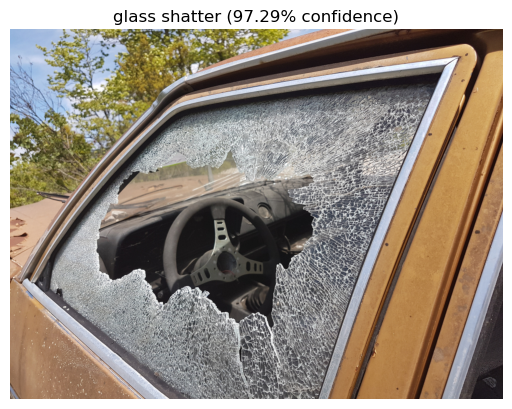

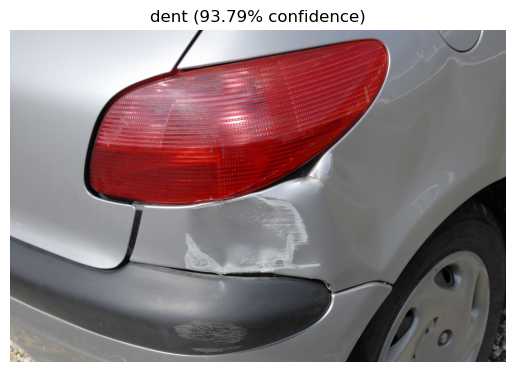

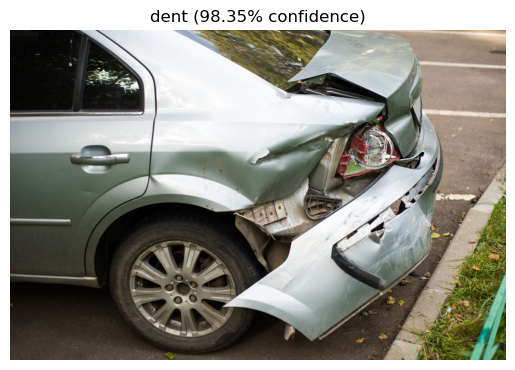

In [42]:
import torch
from torchvision import transforms
from PIL import Image
import os
import json
import matplotlib.pyplot as plt

# Load the model
import torch.nn as nn
import torchvision.models as models

# Recreate the exact architecture from training
model = models.resnet18(pretrained=False)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 6),
    nn.Sigmoid()
)

# Load the state dict
model.load_state_dict(torch.load('car_damage_model.pth'))
model.eval()

# Move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the transformations (to match training preprocessing)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to 224x224
    transforms.ToTensor(),          # Convert image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize to ImageNet standards
])

test_image_folder = '/Users/keenanwillison/Downloads/CarDD_release/CarDD_COCO/test2017'

# Load the damage category mapping from the JSON file (as example mapping you provided earlier)
damage_categories = {1: 'dent', 2: 'scratch', 3: 'crack', 4: 'glass shatter', 5: 'lamp broken', 6: 'tire flat'}

# Function to predict damage type for an image
def predict_damage(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Apply transformations
    img_tensor = transform(img).unsqueeze(0).to(device)

    # Run through the model to get predictions
    with torch.no_grad():
        output = model(img_tensor)
        
    # Apply sigmoid and get the damage classification (class with the highest score)
    output = output.squeeze().cpu().numpy()  # Convert to numpy
    predicted_class = output.argmax()  # Get the class with highest score

    # Get the label for the predicted class
    label = damage_categories[predicted_class + 1]  # +1 because IDs are 1-indexed
    confidence = output[predicted_class]  # Confidence for the predicted class
    
    return label, confidence

# Testing with 3 images in the 'test2017' folder
test_images = os.listdir(test_image_folder)[:3]  # Get the first 3 images in the folder

# Display the images and their classifications
for image_name in test_images:
    image_path = os.path.join(test_image_folder, image_name)
    label, confidence = predict_damage(image_path)
    
    # Load the image to show it
    img = Image.open(image_path)

    # Display image and classification result
    plt.imshow(img)
    plt.title(f'{label} ({confidence*100:.2f}% confidence)')
    plt.axis('off')
    plt.show()